In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sklearn

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
Car_Industry= pd.read_csv("C:\\Users\\Peter\\Downloads\\Data Analysis\\Practicals\\DSN\\free-ai-classes-in-every-city-hackathon\\Train 12.csv")
Car_Industry.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,125000.0
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,110852.0
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,30000.0
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,125206.0


# Checking through the Files 

In [3]:
Car_Industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   float64
dtypes: float64(2), object(7)
memory usage: 506.7+ KB


In [4]:
Car_Industry.describe()

,Amount (Million Naira),Distance
count,7188.000000,4.845000e+03
mean,11.847999,1.031989e+05
std,25.318922,1.182902e+05
min,0.450000,1.000000e+00
25%,3.500000,5.235200e+04
50%,5.650000,8.083000e+04
75%,11.662500,1.175840e+05
max,456.000000,1.985400e+06


# Cleaning the Data

In [5]:
#Car_Industry.isnull()

In [6]:
Car_Industry.isnull().any()

VehicleID                 False
Location                  False
Maker                     False
Model                     False
Year                       True
Colour                    False
Amount (Million Naira)     True
Type                       True
Distance                   True
dtype: bool

In [7]:
Car_Industry.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

# Check the data type

In [8]:
Car_Industry.dtypes

VehicleID                  object
Location                   object
Maker                      object
Model                      object
Year                       object
Colour                     object
Amount (Million Naira)    float64
Type                       object
Distance                  float64
dtype: object

# Convert data type 

In [9]:
#Car_Industry["Distance"].fillna(0, inplace=True)
#Car_Industry.isnull().sum()

In [10]:
#"Car_Industry["Distance.join(number.split(","))

In [11]:
#Car_Industry["Distance"] = Car_Industry.astype({"Distance":"float"})
#Car_Industry["Distance"] = pd.to_numeric(Car_Industry["Distance"])
#Car_Industry["Distance"] =  pd.to_numeric(Car_Industry["Distance"], errors="coerce") #covert string to NAN
#Car_Industry = Car_Industry.replace(np.nan,0, regex=True) #Replace NAN with Zero
#Car_Industry["Distance"] = Car_Industry.Distance.replace("",np.nan).astype(float)
#Car_Industry["Distance"] = pd.to_numeric(Car_Industry["Distance"], downcast="float")

#cat_features = ["Distance","Location","Maker","Year","Colour","Type"]
#for cat_feature in Car_Industry["Distance"]:
 # Car_Industry["Distance_fl"] = Car_Industry["Distance"].astype('float')
#Car_Industry.dtypes

In [12]:
# fill up missing values in Distance wilth the mean
mean_value = Car_Industry["Distance"].mean()
print(mean_value)
Car_Industry["Distance"].fillna(mean_value, inplace=True)

103198.90361197111


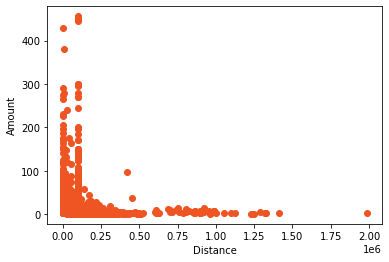

In [16]:
Amount = Car_Industry['Amount (Million Naira)'].values
Distance = Car_Industry['Distance'].values

# Ploting the scores as scatter plot
plt.scatter(Distance, Amount, color='#ef5423')
plt.xlabel("Distance")
plt.ylabel("Amount")
plt.show()

In [17]:
Car_Industry.isnull().sum()

VehicleID                   0
Location                    0
Maker                       0
Model                       0
Year                       21
Colour                      0
Amount (Million Naira)     17
Type                      197
Distance                    0
dtype: int64

In [ ]:
# Drop all Null

In [18]:
Car_Industry.dropna(inplace=True)
Car_Industry.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,103198.903612
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,125000.000000
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,110852.000000
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,30000.000000
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,125206.000000


In [19]:
Car_Industry.isnull().any()

VehicleID                 False
Location                  False
Maker                     False
Model                     False
Year                      False
Colour                    False
Amount (Million Naira)    False
Type                      False
Distance                  False
dtype: bool

In [20]:
# The main of this section is to rename the different 
# class in our categorigal feature that were not properly named.
# or chanage the data type of a column

cat_features = {
    "VehicleID",
    "Location",
    "Maker",
    "Model",
    "Year",
    "Colour",
    "Amount (Million Naira)",
    "Type",
    "Distance",
}

for cat_feature in cat_features:
  print(cat_feature, Car_Industry[cat_feature].unique(), sep=":")
  print("#"*50)

Model:['Accord Coupe EX V-6' 'Sonata' 'RX 350' ... 'Almera 1.6 Lux'
 'X5 3.0i Sports Activity' '320i SV Premium']
##################################################
Amount (Million Naira):[2.200e+00 3.500e+00 9.200e+00 2.280e+01 2.600e+00 7.500e+00 7.900e+01
 9.000e+00 7.760e+00 2.500e+00 7.200e+00 3.260e+00 1.910e+00 6.950e+00
 1.700e+01 3.550e+00 2.200e+01 2.300e+01 1.400e+01 4.900e+00 2.480e+00
 1.600e+01 4.600e+00 1.500e+01 1.185e+01 4.100e+00 4.500e+00 4.200e+00
 7.800e+00 5.900e+00 4.000e+00 2.400e+00 3.000e+00 3.200e+00 2.660e+00
 1.150e+02 3.300e+00 5.500e+00 3.850e+00 2.300e+00 5.890e+01 2.800e+00
 6.500e+00 8.250e+00 6.800e+00 1.460e+00 3.600e+00 6.850e+00 3.750e+00
 1.000e+01 2.810e+00 1.800e+00 6.750e+01 1.500e+00 1.690e+00 9.500e+00
 5.780e+00 9.700e+00 3.800e+00 8.440e+00 4.450e+00 2.900e+01 1.125e+01
 2.050e+00 2.150e+01 5.400e+00 1.069e+01 1.190e+01 7.400e+00 8.680e+00
 8.500e+00 1.200e+00 7.310e+00 3.950e+00 6.000e+00 1.080e+01 5.200e+01
 1.655e+01 4.500e+01 3.900e+00 

In [21]:
# Drop the Model feature
Car_Industry.drop(["Model", "VehicleID"], axis=1, inplace=True)
Car_Industry.head()

,Location,Maker,Year,Colour,Amount (Million Naira),Type,Distance
0,Abuja,Honda,"2,011",Silver,2.2,Nigerian Used,103198.903612
1,Ibadan,Hyundai,"2,012",Silver,3.5,Nigerian Used,125000.000000
2,Lagos,Lexus,"2,010",Red,9.2,Foreign Used,110852.000000
3,Abuja,Mercedes-Benz,"2,017",Blue,22.8,Foreign Used,30000.000000
4,Ibadan,Toyota,"2,002",Red,2.6,Nigerian Used,125206.000000


In [ ]:
#ENCODE Maker,Locations, Colour, Type

In [22]:
# Label Encoding
cat_features = ["Location","Maker","Year","Colour","Type"]

for cat_feature in cat_features:
  Car_Industry[f"{cat_feature}_cat"] = Car_Industry[cat_feature].astype('category')
  Car_Industry[f"{cat_feature}_cat"] = Car_Industry[f"{cat_feature}_cat"].cat.codes


# Read more on Pandas get_dummies

Car_Industry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6972 entries, 0 to 7204
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                6972 non-null   object 
 1   Maker                   6972 non-null   object 
 2   Year                    6972 non-null   object 
 3   Colour                  6972 non-null   object 
 4   Amount (Million Naira)  6972 non-null   float64
 5   Type                    6972 non-null   object 
 6   Distance                6972 non-null   float64
 7   Location_cat            6972 non-null   int8   
 8   Maker_cat               6972 non-null   int8   
 9   Year_cat                6972 non-null   int8   
 10  Colour_cat              6972 non-null   int8   
 11  Type_cat                6972 non-null   int8   
dtypes: float64(2), int8(5), object(5)
memory usage: 469.8+ KB


In [23]:
Car_Industry.head()

,Location,Maker,Year,Colour,Amount (Million Naira),Type,Distance,Location_cat,Maker_cat,Year_cat,Colour_cat,Type_cat
0,Abuja,Honda,"2,011",Silver,2.2,Nigerian Used,103198.903612,0,16,21,15,2
1,Ibadan,Hyundai,"2,012",Silver,3.5,Nigerian Used,125000.000000,1,18,22,15,2
2,Lagos,Lexus,"2,010",Red,9.2,Foreign Used,110852.000000,2,28,20,14,1
3,Abuja,Mercedes-Benz,"2,017",Blue,22.8,Foreign Used,30000.000000,0,33,27,2,1
4,Ibadan,Toyota,"2,002",Red,2.6,Nigerian Used,125206.000000,1,51,12,14,2


In [ ]:
#Car_Industry["Distances"]= np.array(["Distances"])

In [24]:
# Drop the reductant features since Label encoding have been done
Car_Industry.drop(["Location","Distance","Maker","Year","Colour", "Type"], axis=1, inplace=True)
Car_Industry.head()

,Amount (Million Naira),Location_cat,Maker_cat,Year_cat,Colour_cat,Type_cat
0,2.2,0,16,21,15,2
1,3.5,1,18,22,15,2
2,9.2,2,28,20,14,1
3,22.8,0,33,27,2,1
4,2.6,1,51,12,14,2


# Data Segmentation

In [25]:
y = Car_Industry["Amount (Million Naira)"] # Target
X = Car_Industry.drop("Amount (Million Naira)", axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [28]:
reg.predict(X_test)

array([  9.45278531,   6.56155256,  20.1628605 , ..., -15.63237249,
       -12.64600566,  10.13416133])

In [29]:
from sklearn.metrics import mean_absolute_error

# we are using mean_absolute_error because 
# this is a regression model

y_pred = reg.predict(X_test)

print("MAE",mean_absolute_error(y_test,y_pred))

MAE 9.17535273193241


# Making prediction


In [31]:
def predict():
    cust =np.array([1,1,4,1,1]).reshape(1,5)
    df2 = pd.DataFrame(cust, columns = Car_Industry.columns[1:])
    y_pred = reg.predict(df2)
    print(y_pred)
    
predict()

[-14.95921479]


In [32]:
predict_value = pd.DataFrame({
    "VehicleID":X_test["VehicleID_cat"],"Amount (Million Naira)":y_pred
})
predict_value

KeyError: 'VehicleID_cat'

In [ ]:
#predict_value.to_csv("FreeHackton1.csv")